#### Importing necessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer

In [61]:
#Load dataset
customer = pd.read_csv("customer_behavior_analytcis.csv")

#Display the first 5 rows
customer.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [62]:
# Drop the customer_id column since it's not needed for clustering
customer2 = customer.drop(columns=['customer_id'])

#### Data preprocessing

##### Impute the missing values

In [63]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)  
customerimputed = imputer.fit_transform(customer2)

In [64]:
# Scale the data to standardize feature values

customerscaled = StandardScaler().fit_transform(customerimputed)

#### Find the optimal number of clusters - To confirm the given information

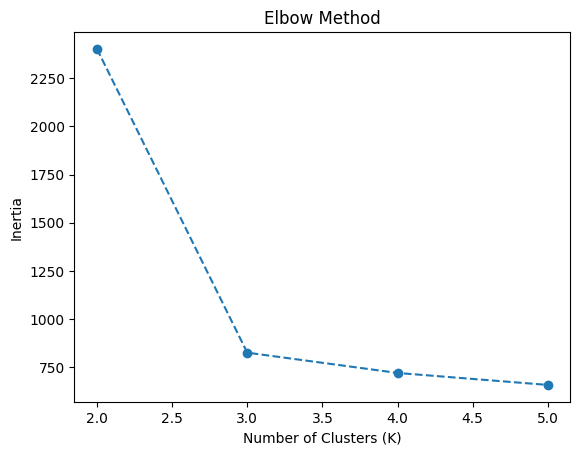

In [65]:
# Elbow Method to find the best K
inertia = [KMeans(n_clusters=k, random_state=42).fit(customerscaled).inertia_ for k in range(2, 6)]

# Plot the results
plt.plot(range(2, 6), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

#### Perform K-Means Clustering

In [66]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer2['Cluster'] = kmeans.fit_predict(customerscaled)


#### Visualizing segments

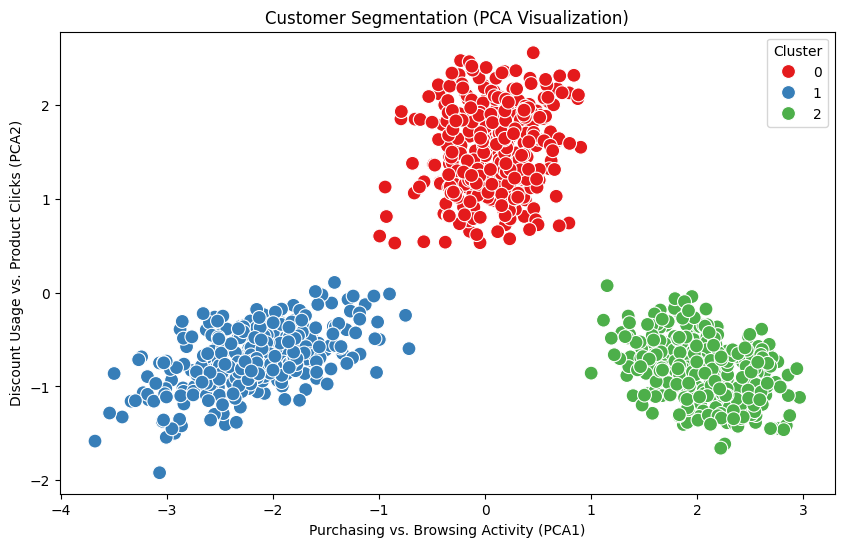

In [67]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(customerscaled)

# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = customer2["Cluster"]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue=df_pca["Cluster"], palette="Set1", s=100)
plt.title("Customer Segmentation (PCA Visualization)")
plt.xlabel("Purchasing vs. Browsing Activity (PCA1)")
plt.ylabel("Discount Usage vs. Product Clicks (PCA2)")
plt.legend(title="Cluster")
plt.show()

In [68]:
# Find average values for each cluster
cluster_summary = customer2.groupby("Cluster").mean()

cluster_summary

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
Cluster,,,,,
0,10.175385,147.327169,40.389730,19.895385,1.945946
1,19.711656,30.399509,17.511682,14.944785,9.969970
2,4.862805,49.029848,90.144865,49.716463,1.024024


#### Labeling the clusters

In [69]:
cluster_mapping = {
    0: "Bargain Hunters",
    1: "High Spenders",
    2: "Window Shoppers"
}

customer2["Segment"] = customer2["Cluster"].map(cluster_mapping)

# Show final results
print(customer2[["Cluster", "Segment"]].head(10))

   Cluster          Segment
0        0  Bargain Hunters
1        1    High Spenders
2        2  Window Shoppers
3        1    High Spenders
4        0  Bargain Hunters
5        0  Bargain Hunters
6        1    High Spenders
7        1    High Spenders
8        1    High Spenders
9        1    High Spenders


In [70]:
#  Add the cluster labels to the initial dataframe
customer['Cluster'] = kmeans.labels_

# Create a 'Segment' column based on cluster labels
customer['Segment'] = customer['Cluster'].apply(lambda x: 'Bargain Hunter' if x == 0 else ('High Spender' if x == 1 else 'Window Shopper'))

#Display the final DataFrame with customer_id, assigned cluster, and segment name
df_with_cluster_details = pd.concat([customer[['customer_id', 'Cluster']], customer['Segment']], axis=1)

# Print the final DataFrame with customer_id, Cluster, and Segment
df_with_cluster_details

,customer_id,Cluster,Segment
0,CM00000,0,Bargain Hunter
1,CM00001,1,High Spender
2,CM00002,2,Window Shopper
3,CM00003,1,High Spender
4,CM00004,0,Bargain Hunter
...,...,...,...
994,CM00994,2,Window Shopper
995,CM00995,2,Window Shopper
996,CM00996,1,High Spender
997,CM00997,2,Window Shopper
